# 서울시 청소년 정신건강 통계분석
- 
- https://data.seoul.go.kr/dataList/10956/S/2/datasetView.do

In [3]:
# !dir 현재 내 위치 확인 가능

In [41]:
import pandas as pd
file_path1 = 'ref/청소년정신건강2024.csv'
file_path2 = 'ref/청소년정신건강2023.csv'
ori = pd.read_csv(file_path1)
ori0 = pd.read_csv(file_path2)
ori0

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [42]:
# ori = ori.loc[:,'스트레스 인지율':]
# ori.loc[2] = 100 - ori.loc[1,'스트레스 인지율':].astype(float)
#컬럼명
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험률','우울남학생','우울여학생','자살생각율','자살남학생','자살여학생']
ori.columns = new_name
ori0.columns = new_name
ori0

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [43]:
# 시점을 없애고, 0번행도 없앰.
ori =ori.loc[1:,'스트레스':]
ori0 = ori0.loc[1:,'스트레스':]
ori0

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
1,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [44]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori.loc[2] = 100 -ori.loc[1,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다.
ori['응답'] = ['그렇다','아니다']
ori

ori0.loc[2] = 100 - ori0.loc[1,'스트레스':].astype(float)
ori0['응답'] = ['그렇다','아니다']
ori0


,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
1,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9,그렇다
2,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1,아니다


In [45]:
ori = ori.set_index('응답')
ori0 = ori0.set_index('응답')
ori0

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
아니다,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1


In [46]:
# os에 사용가능한, 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
# fontlist

Text(0.3, 0.3, '한글')

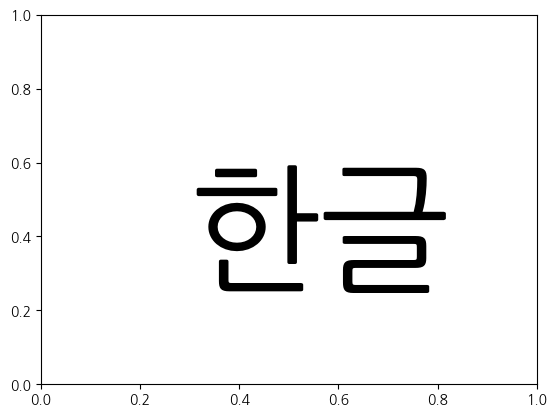

In [47]:
#윈도우용 폰트 경로 설정
path = 'C:\\Windows\\Fonts\\NanumGothicLight.otf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family = font_name)
plt.text(0.3,0.3,'한글',size=100)

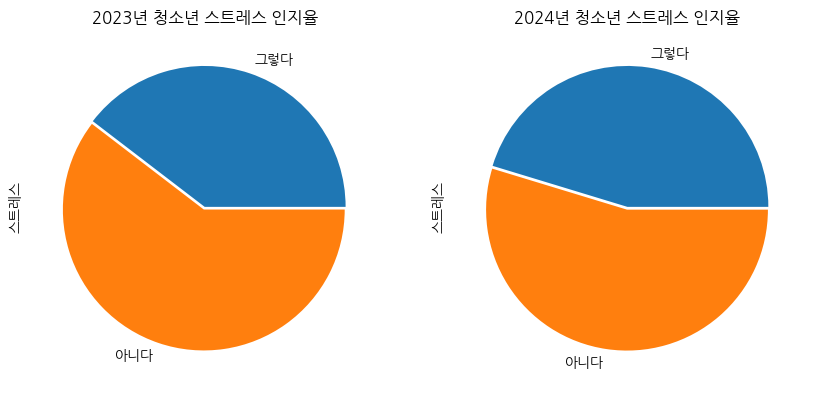

In [55]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ori['스트레스'].astype(float).plot.pie(explode = [0,0.02],ax=ax[1],title ='2024년 청소년 스트레스 인지율')
ori0['스트레스'].astype(float).plot.pie(explode = [0,0.02],ax=ax[0],title = '2023년 청소년 스트레스 인지율')
plt.show()

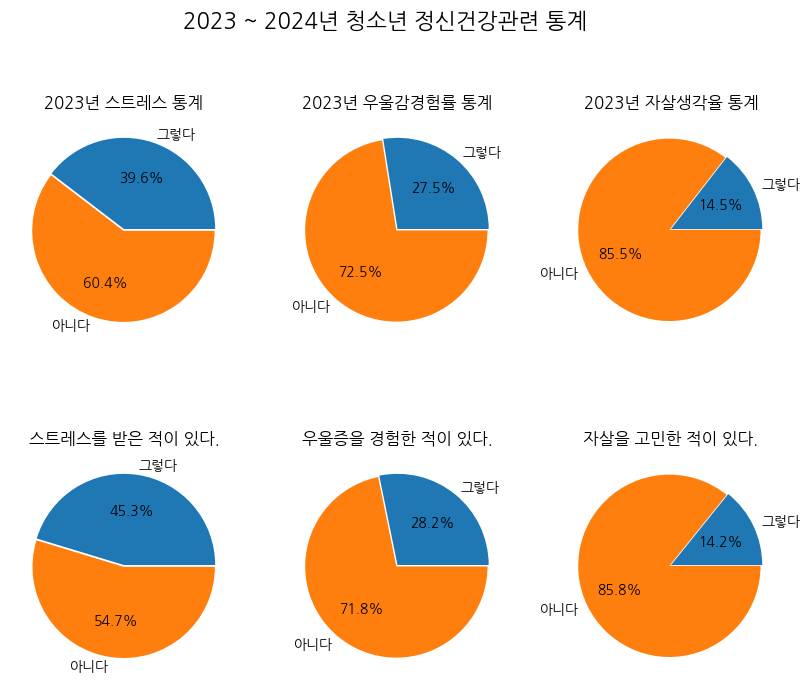

In [65]:
fig , ax = plt.subplots(2,3,figsize = (10,8))
obj = ['스트레스','우울감경험률','자살생각율']
for i,j in enumerate(obj):
    ori0[j].astype(float).plot.pie(explode = [0,0.02], ax =ax[0][i],autopct='%.1f%%')
    ax[0][i].set_title(f"2023년 {j} 통계")
    ax[0][i].set_ylabel('')
    
ori['스트레스'].astype(float).plot.pie(explode = [0,0.02], ax=ax[1][0], autopct="%.1f%%")
ax[1][0].set_title('스트레스를 받은 적이 있다.')
ax[1][0].set_ylabel('')

ori['우울감경험률'].astype(float).plot.pie(explode = [0,0.02], ax=ax[1][1], autopct="%.1f%%")
ax[1][1].set_title('우울증을 경험한 적이 있다.')
ax[1][1].set_ylabel('')

ori['자살생각율'].astype(float).plot.pie(explode = [0,0.02], ax=ax[1][2], autopct="%.1f%%")
ax[1][2].set_title('자살을 고민한 적이 있다.')
ax[1][2].set_ylabel('')

plt.suptitle('2023 ~ 2024년 청소년 정신건강관련 통계',fontsize=16)
plt.show()

In [72]:
ori2023 = ori0[['스트레스', '우울감경험률','자살생각율']]
ori2024 = ori[['스트레스', '우울감경험률','자살생각율']]

In [75]:
# fig, ax = plt.subplots(2,3,figsize = (10,8))